# <center>DATA EXTRACTION</center>
***


## <font color = blue>I. DATA EXTRACTION</font>
> A. LIBRARIES<br>
> B. OCR EXTRACTION<br>
> C. DATA EXTRACTION<br>


> A. LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.linear_model import Ridge
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from helpers import global_classification_report,printmd,read_image,image_to_string
import seaborn as sns
import matplotlib.pyplot as plt
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn import metrics
import itertools
from sklearn.metrics import classification_report
import os.path

df = pd.read_csv('../data/data.csv')

> B. OCR EXTRACTION<br>

In [3]:
def read_image(filename):
  return cv2.imread('../data/final/' + filename)

def ocr_predict(filename):
    for i in range(3):
        try:
            print('Process',filename)
            predictor = ocr_predictor(pretrained=True)
            image = DocumentFile.from_images('../data/final/' + filename)
            result = predictor(image)
        except KeyError as e:
            if i < 2: 
                print('Retry',i)
                continue
            else:
                raise
        break
    return result

def ocr_get_text(document):
    obj = document.export()
    lines=[]
    for page in obj['pages']:
        for block in page['blocks']:
            for line in block['lines']:
                text = ''
                for word in line['words']:
                    text = text + ' ' + word['value']
                lines.append(text)
    return lines

def image_to_string(filename,show=False):  
    result = ocr_predict(filename) 
    if (show):
        image = DocumentFile.from_images('../data/final/' + filename)
        result.show(image)
    return ocr_get_text(result)

Process img_0000081.jpg


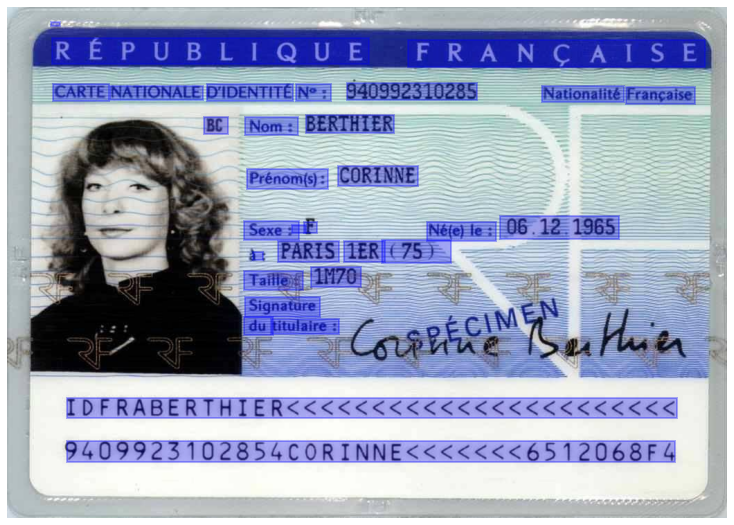

 A REPUBLIQUE FRANCAISE CARTE NATIONALE D'IDENTITE No: 940992310285 Nationalité Française BC Nom: BERTHIER Prénom(s): CORINNE Sexe: = E Né(e)le: 06.12-1965 - PARIS 1ER (75 Taillen 1M70 Signature du titulaire: IDFRABERTHIER<<<<<<<<<<<<<<<<<<<<<<<< 9409923102854CORINNE<<<<<<<6512068F4


In [23]:
from helpers import image_to_string

good = ['img_0000087.jpg','img_0000076.jpg','img_0000081.jpg','img_0000093.jpg']


df_id = df[df['target']=='id piece']
df_id = df[df['filename'].isin(good)]

row = df_id.sample()
filename = row['filename'].values[0]

img = read_image(filename)
text = image_to_string(filename,True)
print(text)

> C. DATA EXTRACTION<br>

In [24]:
import re

print('\nID NUMBER:',re.findall(r'DocumentNo.\s(.*?)\s',text))
print('LAST NAME:',re.findall(r'NOM/S[^\s].*?\s+(.*?)\s',text))
print('FIRST NAME:',re.findall(r'Given[^\s].*?\s+(.*?)SEX',text))


print('\nID NUMBER:',re.findall(r'No:\s(.*?)\s',text))
print('LAST NAME:',re.findall(r'(?:Nom|NOM):\s(.*?)\s',text))
print('FIRST NAME:',re.findall(r'Pr.*?:\s*(.*?)\s',text))


ID NUMBER: []
LAST NAME: []
FIRST NAME: []

ID NUMBER: ['940992310285']
LAST NAME: ['BERTHIER']
FIRST NAME: ['CORINNE']
